# 1 - Loading and Handling the Data


### Lets load up the necessary libraries

+ explain each one :)


In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252

### Lets import 10 stocks from Yahooo!

+ explain why these
+ mention dates


In [142]:
tickers = ["INTC", "MSFT", "TMUS", "MCD", "NKE",
           "PCG", "HLT", "FDX", "BAC", "XOM"]

groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,INTC,53.666466,60.840000,60.970001,60.220001,60.240002,18056000
2020-01-03,INTC,53.013725,60.099998,60.700001,59.810001,59.810001,15293900
2020-01-06,INTC,52.863758,59.930000,60.200001,59.330002,59.590000,17755200
2020-01-07,INTC,51.981670,58.930000,59.799999,58.889999,59.779999,21876100
2020-01-08,INTC,52.016953,58.970001,59.320000,58.520000,58.889999,23133500
...,...,...,...,...,...,...,...
2024-12-23,XOM,104.396103,106.300003,106.599998,104.919998,105.309998,12285100
2024-12-24,XOM,104.494308,106.400002,107.190002,105.699997,106.519997,7807000
2024-12-26,XOM,104.582695,106.489998,107.029999,105.940002,106.519997,9652400


### Since its panel data, lets pivot the dataframe


In [143]:
df_pivot = df.pivot_table(index="Date", columns="Ticker", values="Close")
df_pivot.index = pd.to_datetime(df_pivot.index, dayfirst=True) 
df_pivot.sort_index(inplace=True)
df_pivot

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2020-01-02,35.639999,155.100006,111.449997,60.840000,200.789993,160.619995,102.199997,10.850000,78.589996,70.900002
2020-01-03,34.900002,153.179993,109.989998,60.099998,200.080002,158.619995,101.919998,10.570000,78.169998,70.330002
2020-01-06,34.849998,153.300003,109.419998,59.930000,202.330002,159.029999,101.830002,10.380000,78.620003,70.870003
2020-01-07,34.619999,154.800003,108.290001,58.930000,202.630005,157.580002,101.779999,10.580000,78.919998,70.290001
2020-01-08,34.970001,157.130005,109.209999,58.970001,205.910004,160.089996,101.550003,10.610000,79.419998,69.230003
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,43.889999,269.010010,250.710007,20.200001,291.290009,435.250000,76.760002,19.990000,221.660004,106.300003
2024-12-24,44.380001,271.839996,253.259995,20.400000,293.989990,439.329987,76.790001,20.219999,223.009995,106.400002
2024-12-26,44.549999,278.660004,251.759995,20.440001,294.799988,438.109985,76.940002,20.209999,223.679993,106.489998


### Check for missing values:


In [144]:
df_pivot.isna().sum() #check for missing values

Ticker
BAC     0
FDX     0
HLT     0
INTC    0
MCD     0
MSFT    0
NKE     0
PCG     0
TMUS    0
XOM     0
dtype: int64

# 2 - Data Exploration

#### The head of the pivoted data, shows the first five trading days of our time frame, and the closing price for each stock in the portfolio

In [145]:
df_pivot.head()

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2020-01-02,35.639999,155.100006,111.449997,60.840000,200.789993,160.619995,102.199997,10.85,78.589996,70.900002
2020-01-03,34.900002,153.179993,109.989998,60.099998,200.080002,158.619995,101.919998,10.57,78.169998,70.330002
2020-01-06,34.849998,153.300003,109.419998,59.930000,202.330002,159.029999,101.830002,10.38,78.620003,70.870003
2020-01-07,34.619999,154.800003,108.290001,58.930000,202.630005,157.580002,101.779999,10.58,78.919998,70.290001
2020-01-08,34.970001,157.130005,109.209999,58.970001,205.910004,160.089996,101.550003,10.61,79.419998,69.230003


#### tail:

In [146]:
df_pivot.tail()

Ticker,BAC,FDX,HLT,INTC,MCD,MSFT,NKE,PCG,TMUS,XOM
Date,,,,,,,,,,
2024-12-23,43.889999,269.010010,250.710007,20.200001,291.290009,435.250000,76.760002,19.990000,221.660004,106.300003
2024-12-24,44.380001,271.839996,253.259995,20.400000,293.989990,439.329987,76.790001,20.219999,223.009995,106.400002
2024-12-26,44.549999,278.660004,251.759995,20.440001,294.799988,438.109985,76.940002,20.209999,223.679993,106.489998
2024-12-27,44.340000,280.359985,249.940002,20.299999,293.619995,430.529999,76.419998,20.139999,223.020004,106.480003
2024-12-30,43.910000,280.549988,248.199997,19.820000,289.600006,424.829987,74.650002,20.129999,220.660004,105.760002


## Lets plot the performance of the stocks:

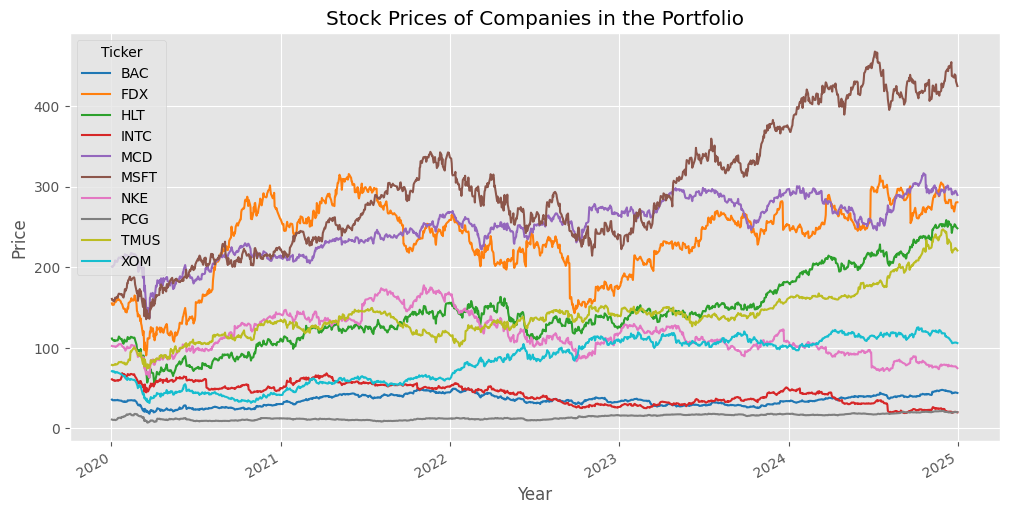

<Figure size 640x480 with 0 Axes>

In [147]:

# copilot used so every stock has a different color (BAC and INTC were the same color):
colors = mpl.colormaps['tab10']
df_pivot.plot(figsize=(12, 6), color=[colors(i) for i in range(0,10)])
###

plt.title("Stock Prices of Companies in the Portfolio")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Ticker")
plt.show()
plt.tight_layout()

# 3 - BACKTESTING

##### caclulating the simple retruns 

In [148]:
df["SimpleReturns"] = df.groupby("Ticker").Close.pct_change()

#### calculating the 20-day moving avaragers and standard deviation of the close price


In [149]:
# Calculate rolling mean and std per ticker
df["SMA"] = df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=20).mean())
df["Dev"] = df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=20).std())


### using the simple moving avarages to calculate the upper and lower band and then creating a signal 

In [ ]:
df["HighBand"] = df["SMA"] + (2 * df["Dev"])
df["LowBand"] = df["SMA"] - (2 * df["Dev"])

# Initialize Signal as 0 (no signal)
df["Signal"] = np.nan

# Set signals: 1 for breakout above, -1 for breakout below& (df.Close > df.SMA) ; & (df.Close < df.SMA)
df.Signal = np.where((df.Close > df.HighBand) & (df.Close > df.SMA), -1, df.Signal)
df.Signal = np.where((df.Close < df.LowBand) & (df.Close < df.SMA), 1, df.Signal)

# Forward fill signals per ticker, then fill remaining NaN with 0
df.Signal = df.groupby("Ticker").Signal.ffill().fillna(0)

######

df["Position"] = df.groupby("Ticker").Signal.shift()
df["Strategy"] = df.SimpleReturns * df.Position
df["Strategy"].fillna(0)

# Ensure no NaNs in Strategy for cumprod, and Ticker is a column



/tmp/ipykernel_34286/632237779.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Strategy"].fillna(0, inplace=True)


/tmp/ipykernel_34286/2878995415.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Strategy"].fillna(0, inplace=True)


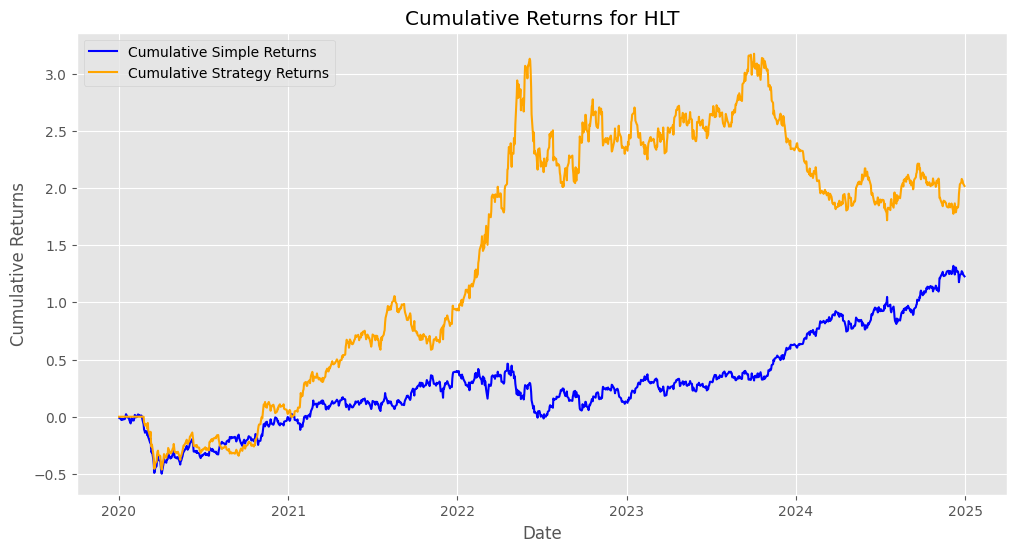

/tmp/ipykernel_34286/2878995415.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_ticker["SMA"] = df_first_ticker["Close"].rolling(window=20).mean()


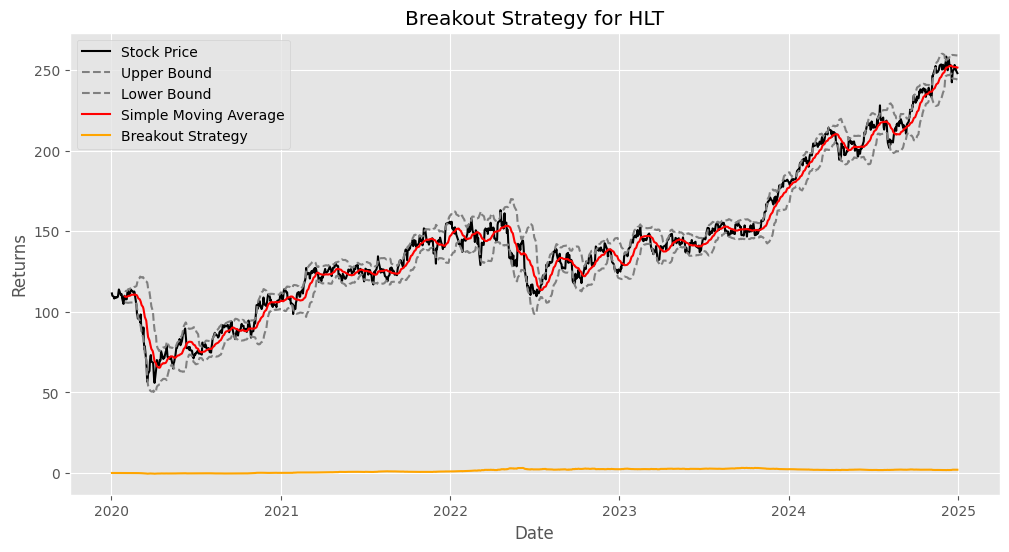

In [ ]:
df["Position"] = df.groupby("Ticker").Signal.shift()
df["Strategy"] = df.SimpleReturns * df.Position
df["Strategy"].fillna(0, inplace=True)

#############
returns = df_pivot.pct_change().dropna()
#############


df["Breakout"] = (1 + df.Strategy).groupby(df["Ticker"]).cumprod() - 1
# Calculate the cumulative returns of the strategy
df["CumulativeReturns"] = (1 + df.SimpleReturns).groupby(df["Ticker"]).cumprod() - 1

# PLOT CUMULATIVE SIMPLE RETURNS VS STRATEGY RETURNS FOR THE FIRST TICKER
first_ticker = df["Ticker"].unique()[6]
df_first_ticker = df[df["Ticker"] == first_ticker]
plt.figure(figsize=(12, 6))
plt.plot(df_first_ticker.index, df_first_ticker["CumulativeReturns"], label="Cumulative Simple Returns", color="blue")
plt.plot(df_first_ticker.index, df_first_ticker["Breakout"], label="Cumulative Strategy Returns", color="orange")
plt.title(f"Cumulative Returns for {first_ticker}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# plot simple moving avarage, stock price and breakout strategy
plt.figure(figsize=(12, 6))
plt.plot(df_first_ticker.index, df_first_ticker["Close"], label="Stock Price", color="black")
# visualise the higher and lower bounds i have already calculated them
plt.plot(df_first_ticker.index, df_first_ticker["HighBand"], label="Upper Bound", color="gray", linestyle='--')
plt.plot(df_first_ticker.index, df_first_ticker["LowBand"], label="Lower Bound", color="gray", linestyle='--')

df_first_ticker["SMA"] = df_first_ticker["Close"].rolling(window=20).mean()
plt.plot(df_first_ticker.index, df_first_ticker["SMA"], label="Simple Moving Average", color="red")
plt.plot(df_first_ticker.index, df_first_ticker["Breakout"], label="Breakout Strategy", color="orange")
plt.title(f"Breakout Strategy for {first_ticker}")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()





### Display the strategy return vs Buy&Hold

In [161]:
final_returns = df.groupby("Ticker")[["CumulativeReturns", "Breakout"]].last()
final_returns

Price,CumulativeReturns,Breakout
Ticker,,
BAC,0.232043,-0.473062
FDX,0.808833,-0.724928
HLT,1.227008,2.017174
INTC,-0.674227,2.305916
MCD,0.442303,-0.166838
MSFT,1.644938,-0.123783
NKE,-0.269569,-0.199757
PCG,0.855299,-0.602400
TMUS,1.807737,0.395279
